In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
%load_ext autoreload
%autoreload 2

from nnqst import rbm_qst, rbm_classic, utils, paper_functions, \
    generators, state_operations, state_representations, fidelities

# Research

## RBM QST

In [59]:
num_units = 3
num_hidd = 3
num_samples = 3000

states = generators.get_all_states(num_units, "tuple")
# phases_sampled = 0.1 * generators.random_phases(len(states))
phases_sampled = generators.random_phases(len(states))
# phases_sampled = np.array([2.62022653e-01, 4.52593227e-01, 7.18638172e-05, 1.89961158e-01])
# phases_sampled = [1.4, 0.9, 0.3, 2.7]

# Filling dicts.
amplitudes, phases = {}, {}
for i in range(len(states)):
    amplitudes[states[i]] = 1. / np.sqrt(len(states))
    phases[states[i]] = phases_sampled[i]

print('> amplitudes:', amplitudes)
print("> phases:", phases)
print(' ')

dataset = generators.generate_Isinglike_dataset(num_units, states, amplitudes, phases, num_samples)

psi_true = dict()
for state in states:
    psi_true[state] = amplitudes[state] * np.exp(1j * phases[state])

print('> psi_true: ', psi_true)
print(' ')
print('> dataset:', dataset)

> amplitudes: {(0, 0, 0): 0.35355339059327373, (0, 0, 1): 0.35355339059327373, (0, 1, 0): 0.35355339059327373, (0, 1, 1): 0.35355339059327373, (1, 0, 0): 0.35355339059327373, (1, 0, 1): 0.35355339059327373, (1, 1, 0): 0.35355339059327373, (1, 1, 1): 0.35355339059327373}
> phases: {(0, 0, 0): 2.6246657746589355, (0, 0, 1): 3.8665836839648575, (0, 1, 0): 2.5823086725687583, (0, 1, 1): 5.3183393176785705, (1, 0, 0): 3.8378898050709482, (1, 0, 1): 3.44104435182852, (1, 1, 0): 3.1274478989585495, (1, 1, 1): 4.767662712920413}
 
> psi_true:  {(0, 0, 0): (-0.3073588301490961+0.1747299331236039j), (0, 0, 1): (-0.26463661144510653-0.23445141049448115j), (0, 1, 0): (-0.2996843106818046+0.18758814976210947j), (0, 1, 1): (0.20136402622495636-0.2906071729026575j), (1, 0, 0): (-0.27125407341305424-0.22676249173270557j), (1, 0, 1): (-0.3378196918717959-0.1042969596088249j), (1, 1, 0): (-0.35351802274765265+0.005000759201374636j), (1, 1, 1): (0.01953226621976671-0.35301344248671346j)}
 
> dataset: {'H

## (1/2) Amplitudes.

In [60]:
dataset_Z = generators.generate_dataset(states, ['I' * num_units], amplitudes, phases, num_samples)

quantum_basis = states
r_qst = rbm_qst.RBM_QST(quantum_basis, num_units, num_hidd)
r_qst.train_amplitudes(dataset_Z, max_epochs=1000, learning_rate=0.9, debug=True, precise=True)

Epoch 0: objective is 2.081588653340965
Epoch 500: objective is 2.0786221850898814


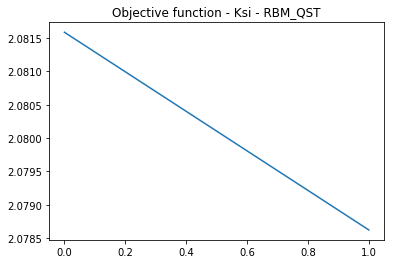

In [61]:
plt.plot(r_qst.objectives)
plt.title('Objective function - Ksi - RBM_QST')
plt.show()

In [62]:
# Fidelity.
fid, sampled_from_RBM = fidelities.fidelity_RBM(r_qst, psi_true, num_samples=2000)
fid

0.4177346140052962

In [63]:
sampled_from_RBM

{(0, 0, 0): 0.363318042491699,
 (0, 0, 1): 0.36606010435446257,
 (0, 1, 0): 0.372827037646145,
 (0, 1, 1): 0.3391164991562634,
 (1, 0, 0): 0.34132096331752027,
 (1, 0, 1): 0.36262928728937494,
 (1, 1, 0): 0.33763886032268264,
 (1, 1, 1): 0.34351128074635334}

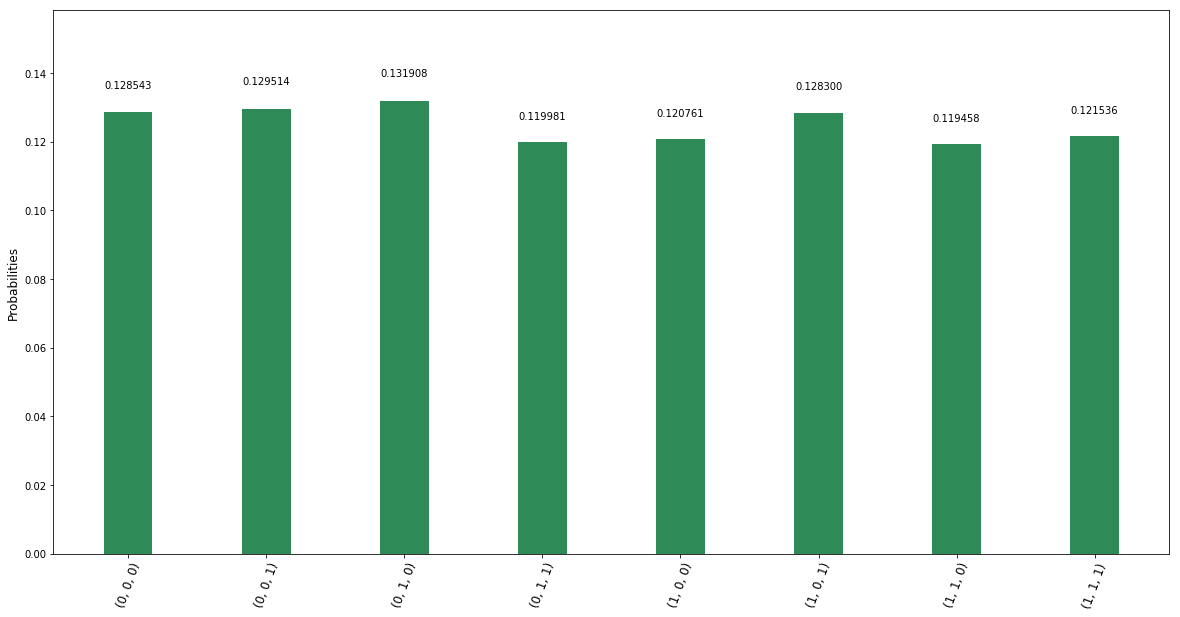

In [64]:
utils.plot_histogram(sampled_from_RBM)

In [65]:
print(r_qst.weights_lambda)

[[ 0.          0.02823191 -0.01757888 -0.00358638]
 [-0.09543823 -0.50608713  0.38056096  0.10662238]
 [ 0.08639636  0.20871483 -0.14835312 -0.06318598]
 [-0.05970983 -0.48988524  0.36184751  0.09540727]]


## (2/2) Phases.

In [66]:
basis_set = generators.generate_Isinglike_basis_set(num_units)
print('> basis_set:', basis_set)

print('> dataset:', dataset)

> basis_set: ['HII', 'IHI', 'IIH', 'KII', 'IKI', 'IIK']
> dataset: {'HII': {(0, 1, 0): 659, (0, 0, 1): 726, (0, 0, 0): 504, (1, 1, 0): 62, (0, 1, 1): 708, (1, 0, 0): 235, (1, 1, 1): 72, (1, 0, 1): 34}, 'IHI': {(1, 1, 1): 286, (0, 0, 1): 436, (0, 0, 0): 767, (1, 0, 1): 415, (0, 1, 1): 355, (1, 0, 0): 653, (1, 1, 0): 87, (0, 1, 0): 1}, 'IIH': {(1, 1, 0): 385, (0, 1, 1): 718, (0, 0, 0): 480, (1, 1, 1): 370, (0, 0, 1): 272, (1, 0, 0): 721, (0, 1, 0): 27, (1, 0, 1): 27}, 'KII': {(0, 1, 1): 159, (0, 1, 0): 558, (0, 0, 0): 764, (0, 0, 1): 229, (1, 0, 1): 509, (1, 0, 0): 23, (1, 1, 1): 607, (1, 1, 0): 151}, 'IKI': {(1, 1, 0): 621, (0, 0, 0): 334, (0, 0, 1): 726, (1, 0, 1): 775, (0, 1, 0): 393, (1, 0, 0): 136, (0, 1, 1): 3, (1, 1, 1): 12}, 'IIK': {(1, 1, 0): 766, (0, 1, 0): 547, (1, 0, 1): 494, (0, 0, 0): 683, (1, 0, 0): 226, (0, 1, 1): 252, (0, 0, 1): 29, (1, 1, 1): 3}}


In [67]:
r_qst.train_phases(dataset, basis_set=basis_set, max_epochs=1000,
                   learning_rate=0.05, debug=True, precise=True)

Epoch 0: objective is 2.5784161138654387
Epoch 500: objective is 2.491165289402725


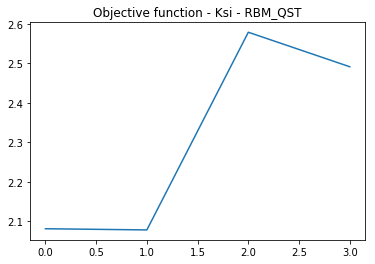

In [68]:
plt.plot(r_qst.objectives)
plt.title('Objective function - Ksi - RBM_QST')
plt.show()

In [69]:
# Fidelity.
fid = fidelities.fidelity_RBM_PRECISE(r_qst, psi_true)
print('precise:', fid)

fid, sampled_from_RBM = fidelities.fidelity_RBM(r_qst, psi_true, num_samples=2000)
print('sampled:', fid)

precise: 0.07169020181707851
sampled: 0.4104019030838016


In [70]:
r_qst.weights_mu

array([[ 0.        ,  0.39444854, -0.29283651, -0.04180384],
       [ 0.88324158,  0.52832451,  0.31469288,  0.55536838],
       [-5.46402469, -1.330711  , -3.81356631, -3.04785117],
       [-6.34357698, -2.64224975, -3.66855709, -3.23374736]])

In [71]:
# Phases
psi_rbm_lst = list(utils.psi_RBM(r_qst).values())
psi_true_lst = list(psi_true)
print(psi_true_lst)
phases_RBM = np.log(psi_rbm_lst).imag
phases_true = np.array(list(phases.values()))
print(phases_RBM%np.pi)
print(phases_true%np.pi)
print(np.array(phases_true - phases_RBM)%(2*np.pi))

[(0, 0, 0), (0, 0, 1), (0, 1, 0), (0, 1, 1), (1, 0, 0), (1, 0, 1), (1, 1, 0), (1, 1, 1)]
[1.06978453 0.04799083 0.60540607 0.39425791 1.91365804 0.53858973
 1.15543769 0.84598504]
[2.62466577 0.72499103 2.58230867 2.17674666 0.69629715 0.2994517
 3.1274479  1.62607006]
[1.55488125 0.6770002  5.11849525 4.9240814  1.92423176 6.04404727
 5.11360286 3.92167767]


In [72]:
phases_true

array([2.62466577, 3.86658368, 2.58230867, 5.31833932, 3.83788981,
       3.44104435, 3.1274479 , 4.76766271])

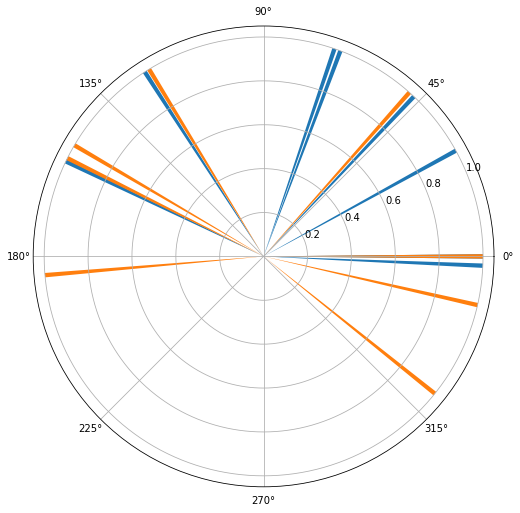

In [74]:
radii = np.ones(8)
fig = plt.figure(figsize=(8,8))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8], polar=True)
ax.bar(phases_true - phases_true[0], radii, width=0.02, bottom=0.0)
ax.bar(phases_RBM - phases_RBM[0], radii, width=0.02, bottom=0.0)
plt.show()

# Plot Fig.1 b

In [75]:
import tqdm

num_units = 3
fidelities = list()
N_samples = [50, 100, 500, 1000]

for N_s in tqdm.tqdm(N_samples):
    dataset = utils.dataset_w(num_units, N_s)
    
    r_cl = rbm_classic.RBM(num_units, num_units, debug_print=False)
    r_cl.train(dataset, max_epochs=10000, learning_rate=0.3)

    fidelities.append(utils.fidelity_RBM(r_cl, utils.into_dict(utils.ideal_w(num_units)))[0])

overlaps = list(map(lambda x: np.sqrt(x), fidelities))

  0%|          | 0/4 [00:00<?, ?it/s]


AttributeError: module 'nnqst.utils' has no attribute 'dataset_w'

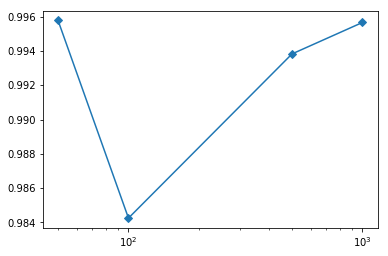

In [20]:
plt.semilogx(N_samples, overlaps, '.-', marker='D')
plt.show()

In [48]:
import tqdm

num_units = 5
fidelities = list()
N_samples = [50, 100, 500, 1000]

for N_s in tqdm.tqdm(N_samples):
    dataset = utils.dataset_w(num_units, N_s)
    
    r_qst = rbm_qst.RBM_QST(num_units, num_units)
    r_qst.train(dataset, dataset, max_epochs=3000, learning_rate=0.5)

    fid, states = utils.fidelity_RBM(r_qst, utils.into_dict(utils.ideal_w(num_units)))
    fidelities.append(fid)
    print(fidelities[-1])

overlaps = list(map(lambda x: np.sqrt(x), fidelities))


 25%|██▌       | 1/4 [00:12<00:37, 12.63s/it]

0.298996136808


 50%|█████     | 2/4 [00:24<00:25, 12.55s/it]

0.913126897567


 75%|███████▌  | 3/4 [00:36<00:12, 12.32s/it]

0.96150806699


100%|██████████| 4/4 [00:49<00:00, 12.35s/it]

0.948565339316


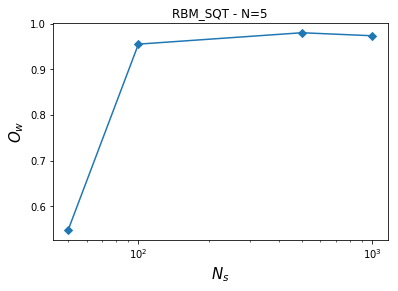

In [49]:
plt.semilogx(N_samples, overlaps, '.-', marker='D')
plt.title('RBM_SQT - N={}'.format(num_units))
plt.xlabel('$N_s$', fontsize=15)
plt.ylabel('$O_w$', fontsize=15)
plt.show()

In [81]:
basis = 'IHIK'

In [82]:
a = [2,3,0,1]

In [86]:
basis.find('J')

-1

In [85]:
a

[2, 3, 0, 8]

In [67]:
(basis=='I').any()

AttributeError: 'bool' object has no attribute 'any'

In [83]:
a

[2, 3, 0, 1]